<a href="https://colab.research.google.com/github/oburckard/PFE/blob/master/Tsunami.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

t=: 0.0


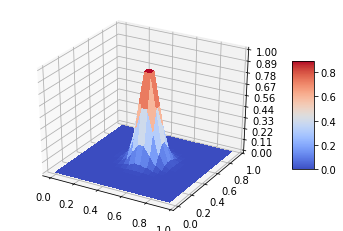

t=: 0.02


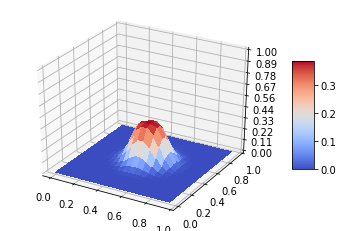

t=: 0.04


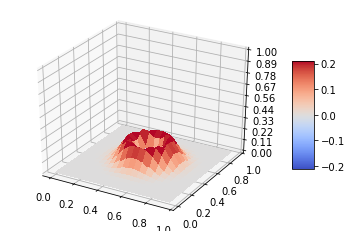

t=: 0.06


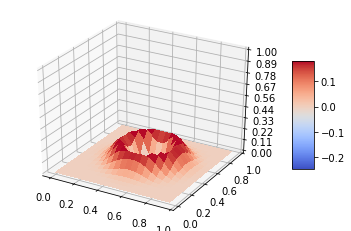

t=: 0.08


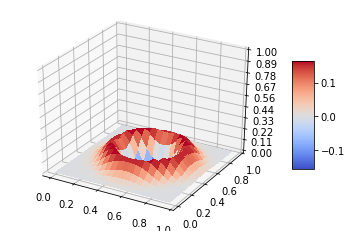

t=: 0.1


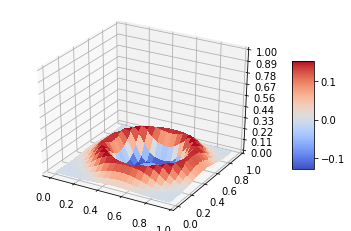

t=: 0.12


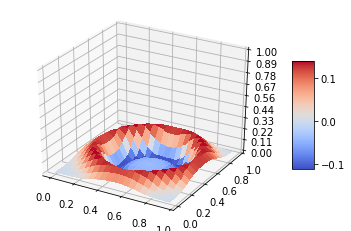

t=: 0.14


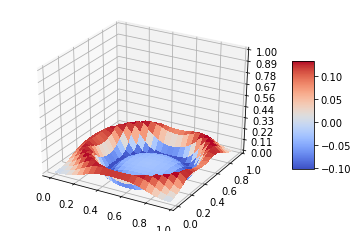

t=: 0.16


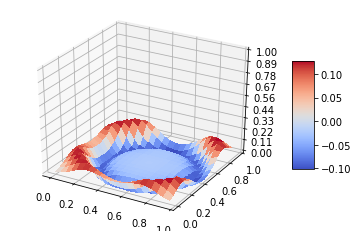

t=: 0.18


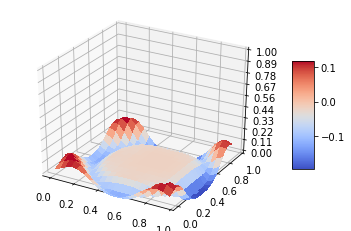

t=: 0.2


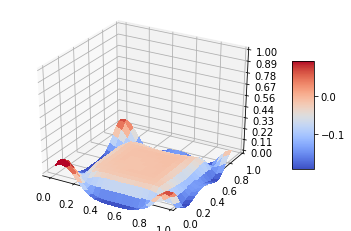

t=: 0.22


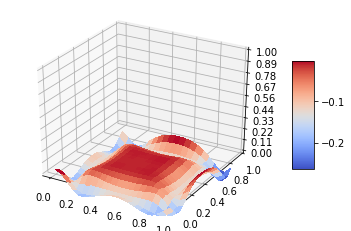

t=: 0.24


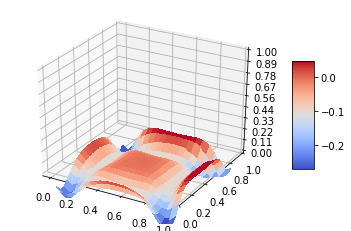

t=: 0.26


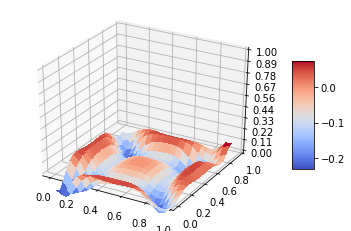

t=: 0.28


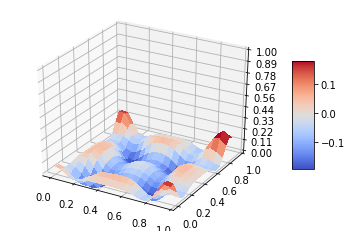

t=: 0.3


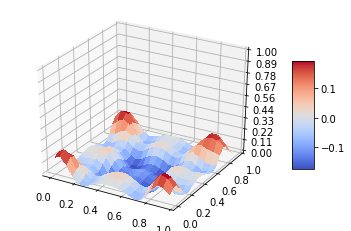

t=: 0.32


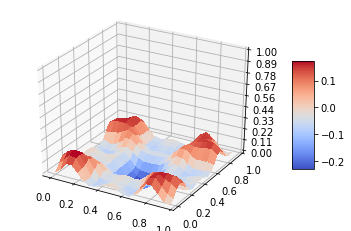

t=: 0.34


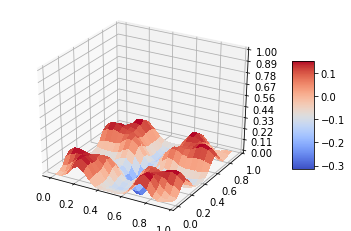

t=: 0.36


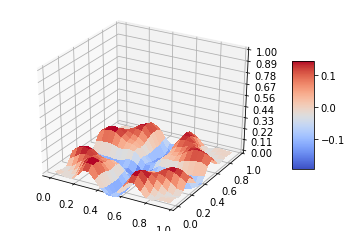

t=: 0.38


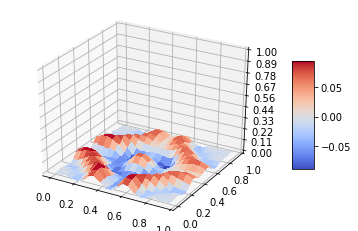

t=: 0.4


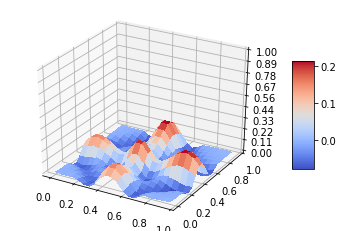

t=: 0.42


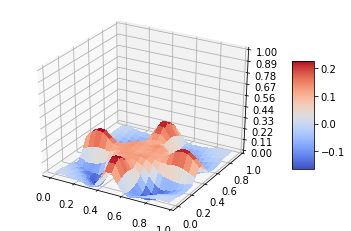

t=: 0.44


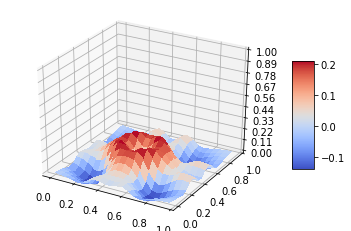

t=: 0.46


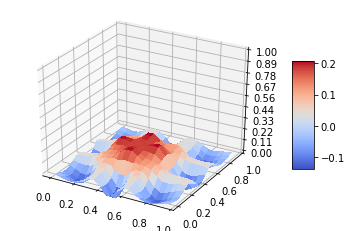

t=: 0.48


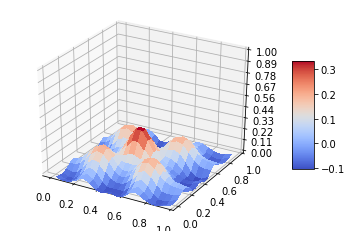

In [12]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


# Constantes
N = 20
g = 9.8 #gravite, 9,8m/s

# Valeurs des pas
dx = 1.0/(N+1.0) 
dy = 1.0/(N+1.0)
dt = 0.002 #dt<min(dx,dy)
dt2 = dt*dt
dx2 = dx*dx
dy2 = dy*dy
dt2_dx2 = dt2/dx2
dt2_dy2 = dt2/dy2


xi = np.arange(0, 1, dx) 
yj = np.arange(0, 1, dy)
t = np.arange(0, 0.5, dt) 




#Initialisation des matrices
F_nm1 = np.zeros((N+1,N+1)) #matrice au temps n-1
F_n = np.zeros((N+1,N+1))  #matrice au temps n
F_np1 = np.zeros((N+1,N+1)) #matrice au temps n+1


#On appelle h la profondeur 
#definition de la topographie
def h(x,y): #on prend une profondeur valant 1 partout
  return 1
   

#Fonction source aux 2 premiers temps
for i in range(0,N+1):
  for j in range(0,N+1):
      F_nm1[i,j]=np.exp(-100*((xi[i]-0.5)**2+(yj[j]-0.5)**2))#*np.sin(np.pi*t[tp]) #debut au centre
      F_n[i,j]=F_nm1[i,j]



#Representation graphique
ite = 0
X, Y = np.meshgrid(xi, yj)
for tp in t:
  ite += 1

  #Pour afficher la surface tous les 10 pas de temps
  if((ite-1) % 10 == 0):
    fig = plt.figure()
    ax = fig.gca(projection='3d')   
    surf = ax.plot_surface(X, Y, F_n, cmap=cm.coolwarm,linewidth=0, antialiased=False)
    
    # Pour "choisir" les valeurs de l'axe des z affichees
    ax.set_zlim(0, 1)
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

    # Legende des couleurs avec leurs valeurs
    fig.colorbar(surf, shrink=0.5, aspect=5)
    print('t=:',tp)
    plt.show()

  #Pour determiner la position a l'instant suivant
  for i in range(1,N,1):
    for j in range(1,N,1):
      F_np1[i,j] = -F_nm1[i,j]+2*F_n[i,j]*(1-g*h(xi[i],yj[j])*(dt2_dx2+dt2_dy2))
      F_np1[i,j] = F_np1[i,j]+F_n[i+1,j]*(g*h(xi[i],yj[j])*dt2_dx2+g*dt2_dx2*0.25*(h(xi[i+1],yj[j])-h(xi[i-1],yj[j])))+F_n[i-1,j]*(g*h(xi[i],yj[j])*dt2_dx2-g*dt2_dx2*0.25*(h(xi[i+1],yj[j])-h(xi[i-1],yj[j])))
      F_np1[i,j] = F_np1[i,j]+F_n[i,j+1]*(g*h(xi[i],yj[j])*dt2_dy2+g*dt2_dy2*0.25*(h(xi[i],yj[j+1])-h(xi[i],yj[j-1])))+F_n[i,j-1]*(g*h(xi[i],yj[j])*dt2_dy2-g*dt2_dy2*0.25*(h(xi[i],yj[j+1])-h(xi[i],yj[j-1])))
    

  #Conditions aux limites (vaut 0 quand on "passe" le bord)

  #i=j=0
  i=0
  j=0
  F_np1[i,j] = -F_nm1[i,j]+2*F_n[i,j]*(1-g*h(xi[i],yj[j])*(dt2_dx2+dt2_dy2))
  F_np1[i,j] = F_np1[i,j]+F_n[i+1,j]*(g*h(xi[i],yj[j])*dt2_dx2+g*dt2_dx2*0.25*h(xi[i+1],yj[j]))
  F_np1[i,j] = F_np1[i,j]+F_n[i,j+1]*(g*h(xi[i],yj[j])*dt2_dy2+g*dt2_dy2*0.25*h(xi[i],yj[j+1]))

  #i=0, 0<j<N
  for j in range(1,N,1):
    F_np1[i,j] = -F_nm1[i,j]+2*F_n[i,j]*(1-g*h(xi[i],yj[j])*(dt2_dx2+dt2_dy2))
    F_np1[i,j] = F_np1[i,j]+F_n[i+1,j]*(g*h(xi[i],yj[j])*dt2_dx2+g*dt2_dx2*0.25*h(xi[i+1],yj[j]))
    F_np1[i,j] = F_np1[i,j]+F_n[i,j+1]*(g*h(xi[i],yj[j])*dt2_dy2+g*dt2_dy2*0.25*(h(xi[i],yj[j+1])-h(xi[i],yj[j-1])))+F_n[i,j-1]*(g*h(xi[i],yj[j])*dt2_dy2-g*dt2_dy2*0.25*(h(xi[i],yj[j+1])-h(xi[i],yj[j-1])))
  
  #i=0, j=N
  j=N
  F_np1[i,j] = -F_nm1[i,j]+2*F_n[i,j]*(1-g*h(xi[i],yj[j])*(dt2_dx2+dt2_dy2))
  F_np1[i,j] = F_np1[i,j]+F_n[i+1,j]*(g*h(xi[i],yj[j])*dt2_dx2+g*dt2_dx2*0.25*h(xi[i+1],yj[j]))
  F_np1[i,j] = F_np1[i,j]+F_n[i,j-1]*(g*h(xi[i],yj[j])*dt2_dy2-g*dt2_dy2*0.25*(-h(xi[i],yj[j-1])))
  
  #0<i<N, j=0
  j=0
  for i in range(1,N,1):
    F_np1[i,j] = -F_nm1[i,j]+2*F_n[i,j]*(1-g*h(xi[i],yj[j])*(dt2_dx2+dt2_dy2))
    F_np1[i,j] = F_np1[i,j]+F_n[i+1,j]*(g*h(xi[i],yj[j])*dt2_dx2+g*dt2_dx2*0.25*(h(xi[i+1],yj[j])-h(xi[i-1],yj[j])))+F_n[i-1,j]*(g*h(xi[i],yj[j])*dt2_dx2-g*dt2_dx2*0.25*(h(xi[i+1],yj[j])-h(xi[i-1],yj[j])))
    F_np1[i,j] = F_np1[i,j]+F_n[i,j+1]*(g*h(xi[i],yj[j])*dt2_dy2+g*dt2_dy2*0.25*h(xi[i],yj[j+1]))

  #i=N, j=0
  i=N
  F_np1[i,j] = -F_nm1[i,j]+2*F_n[i,j]*(1-g*h(xi[i],yj[j])*(dt2_dx2+dt2_dy2))
  F_np1[i,j] = F_np1[i,j]+F_n[i-1,j]*(g*h(xi[i],yj[j])*dt2_dx2-g*dt2_dx2*0.25*(-h(xi[i-1],yj[j])))
  F_np1[i,j] = F_np1[i,j]+F_n[i,j+1]*(g*h(xi[i],yj[j])*dt2_dy2+g*dt2_dy2*0.25*(h(xi[i],yj[j+1])))
  
  #i=N, 1<j<N
  for j in range(1,N,1):
    F_np1[i,j] = -F_nm1[i,j]+2*F_n[i,j]*(1-g*h(xi[i],yj[j])*(dt2_dx2+dt2_dy2))
    F_np1[i,j] = F_np1[i,j]+F_n[i-1,j]*(g*h(xi[i],yj[j])*dt2_dx2-g*dt2_dx2*0.25*(-h(xi[i-1],yj[j])))
    F_np1[i,j] = F_np1[i,j]+F_n[i,j+1]*(g*h(xi[i],yj[j])*dt2_dy2+g*dt2_dy2*0.25*(h(xi[i],yj[j+1])-h(xi[i],yj[j-1])))+F_n[i,j-1]*(g*h(xi[i],yj[j])*dt2_dy2-g*dt2_dy2*0.25*(h(xi[i],yj[j+1])-h(xi[i],yj[j-1]))) 
  
  #i=j=N
  j=N
  F_np1[i,j] = -F_nm1[i,j]+2*F_n[i,j]*(1-g*h(xi[i],yj[j])*(dt2_dx2+dt2_dy2))
  F_np1[i,j] = F_np1[i,j]+F_n[i-1,j]*(g*h(xi[i],yj[j])*dt2_dx2-g*dt2_dx2*0.25*(-h(xi[i-1],yj[j])))
  F_np1[i,j] = F_np1[i,j]+F_n[i,j-1]*(g*h(xi[i],yj[j])*dt2_dy2-g*dt2_dy2*0.25*(-h(xi[i],yj[j-1])))

  #0<i<N, j=N
  for i in range(1,N,1):
    F_np1[i,j] = -F_nm1[i,j]+2*F_n[i,j]*(1-g*h(xi[i],yj[j])*(dt2_dx2+dt2_dy2))
    F_np1[i,j] = F_np1[i,j]+F_n[i+1,j]*(g*h(xi[i],yj[j])*dt2_dx2+g*dt2_dx2*0.25*(h(xi[i+1],yj[j])-h(xi[i-1],yj[j])))+F_n[i-1,j]*(g*h(xi[i],yj[j])*dt2_dx2-g*dt2_dx2*0.25*(h(xi[i+1],yj[j])-h(xi[i-1],yj[j])))
    F_np1[i,j] = F_np1[i,j]+F_n[i,j-1]*(g*h(xi[i],yj[j])*dt2_dy2-g*dt2_dy2*0.25*(-h(xi[i],yj[j-1])))

 

  #Les positions du temps n-1 prennent les valeurs de celles du temps n et celles du temps n prennent les valeurs du temps n+1
  F_nm1 = F_n*1.0
  F_n = F_np1*1.0
